In [2]:
install.packages('mlbench')
install.packages('MASS')
install.packages('pROC')

Installing package into 'C:/Users/Jaswinder Singh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jaswinder Singh\AppData\Local\Temp\RtmpKwkhY3\downloaded_packages


Installing package into 'C:/Users/Jaswinder Singh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jaswinder Singh\AppData\Local\Temp\RtmpKwkhY3\downloaded_packages


Installing package into 'C:/Users/Jaswinder Singh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jaswinder Singh\AppData\Local\Temp\RtmpKwkhY3\downloaded_packages


In [3]:
library(mlbench)
library(MASS)
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [4]:
data(PimaIndiansDiabetes2)
head(PimaIndiansDiabetes2)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,NA,33.6,0.627,50,pos
2,1,85,66,29,NA,26.6,0.351,31,neg
3,8,183,64,NA,NA,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,NA,NA,25.6,0.201,30,neg


In [5]:
summary(PimaIndiansDiabetes2)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            mass          pedigree           age        diabetes 
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00            
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 M

In [6]:
newdata <- na.omit(PimaIndiansDiabetes2)
summary(newdata)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   : 56.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.:21.00  
 Median : 2.000   Median :119.0   Median : 70.00   Median :29.00  
 Mean   : 3.301   Mean   :122.6   Mean   : 70.66   Mean   :29.15  
 3rd Qu.: 5.000   3rd Qu.:143.0   3rd Qu.: 78.00   3rd Qu.:37.00  
 Max.   :17.000   Max.   :198.0   Max.   :110.00   Max.   :63.00  
    insulin            mass          pedigree           age        diabetes 
 Min.   : 14.00   Min.   :18.20   Min.   :0.0850   Min.   :21.00   neg:262  
 1st Qu.: 76.75   1st Qu.:28.40   1st Qu.:0.2697   1st Qu.:23.00   pos:130  
 Median :125.50   Median :33.20   Median :0.4495   Median :27.00            
 Mean   :156.06   Mean   :33.09   Mean   :0.5230   Mean   :30.86            
 3rd Qu.:190.00   3rd Qu.:37.10   3rd Qu.:0.6870   3rd Qu.:36.00            
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.00     

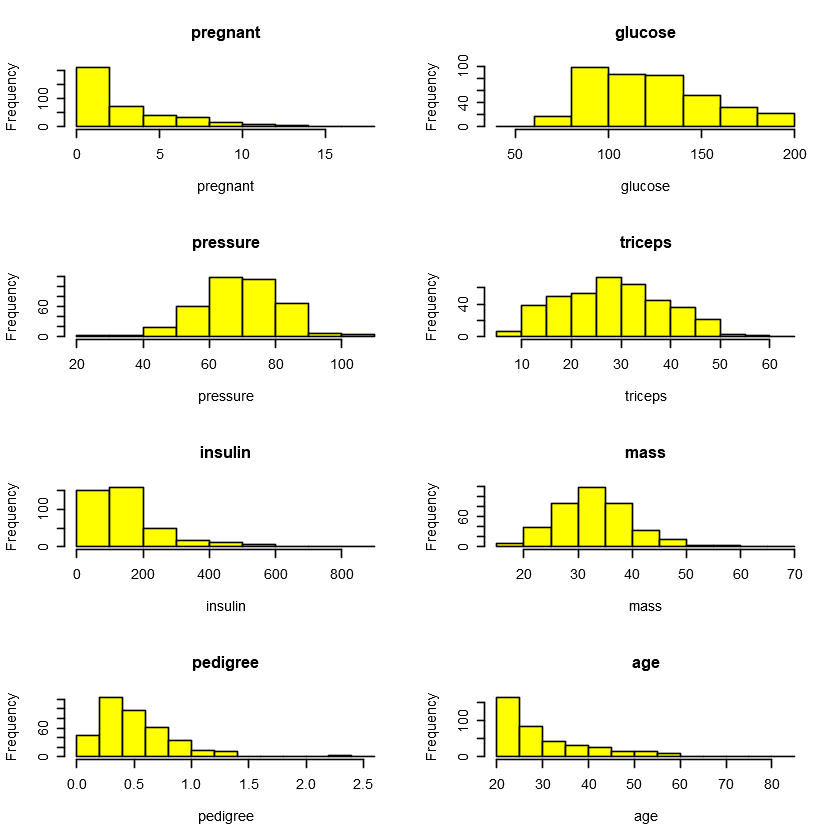

In [7]:
par(mfrow = c(4,2))
for(i in 1:8) {
    hist(newdata[,i], main = colnames(newdata)[i], xlab = colnames(newdata)[i], col = 'yellow')
}  

In [8]:
newdata$age_bucket <- as.factor(ifelse(newdata$age<=30,"20-30",
                                       ifelse(newdata$age<=40,"31-40",
                                              ifelse(newdata$age<=50,"41-50","50+"))))

In [9]:
newdata$preg_bucket <- as.factor(ifelse(newdata$pregnant<=5,"0–5",
                                        ifelse(newdata$pregnant<=10,"6–10","10+")))

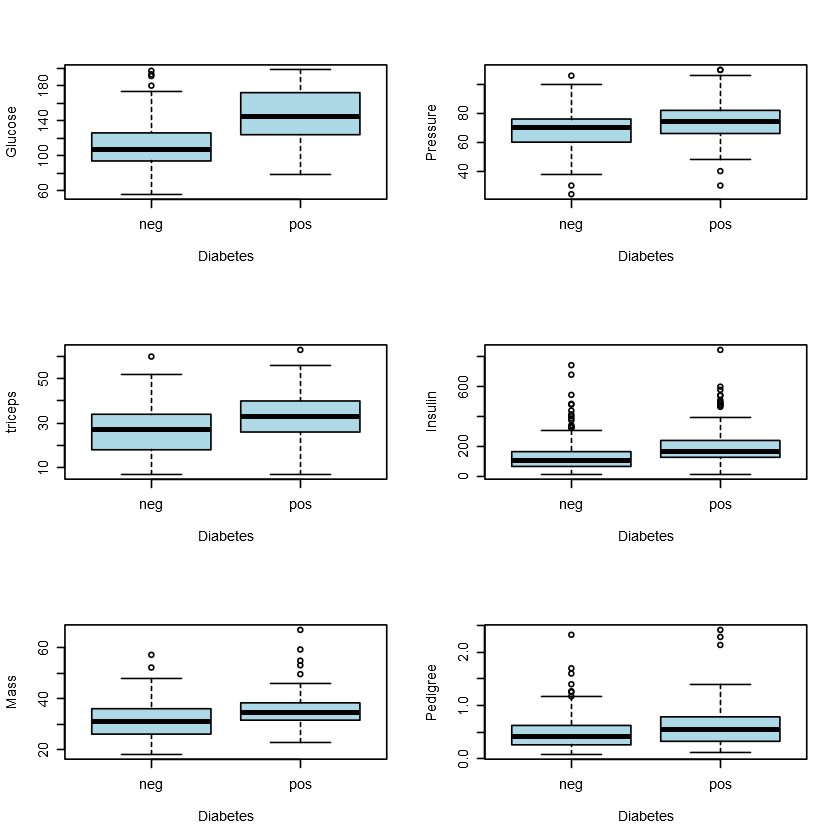

In [10]:
par(mfrow = c(3,2))
boxplot(glucose~diabetes, ylab="Glucose", xlab= "Diabetes", col="light blue",data = newdata)
boxplot(pressure~diabetes, ylab="Pressure", xlab= "Diabetes", col="light blue",data = newdata)
boxplot(triceps~diabetes, ylab="triceps", xlab= "Diabetes", col="light blue",data = newdata)
boxplot(insulin~diabetes, ylab="Insulin", xlab= "Diabetes", col="light blue",data = newdata)
boxplot(mass~diabetes, ylab="Mass", xlab= "Diabetes", col="light blue",data = newdata)
boxplot(pedigree~diabetes, ylab="Pedigree", xlab= "Diabetes", col="light blue",data = newdata)

In [11]:
xtabs(~diabetes + age_bucket, data = newdata)
xtabs(~diabetes + preg_bucket, data = newdata)

        age_bucket
diabetes 20-30 31-40 41-50 50+
     neg   197    39    18   8
     pos    51    35    24  20

        preg_bucket
diabetes 0–5 10+ 6–10
     neg 222   4   36
     pos  84  12   34

In [12]:
newdata2 <- newdata[,c("diabetes","glucose","pressure","triceps","insulin","mass","pedigree","age_bucket","preg_bucket")]

In [14]:
head(newdata2)

,diabetes,glucose,pressure,triceps,insulin,mass,pedigree,age_bucket,preg_bucket
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
4,neg,89,66,23,94,28.1,0.167,20-30,0–5
5,pos,137,40,35,168,43.1,2.288,31-40,0–5
7,pos,78,50,32,88,31.0,0.248,20-30,0–5
9,pos,197,70,45,543,30.5,0.158,50+,0–5
14,pos,189,60,23,846,30.1,0.398,50+,0–5
15,pos,166,72,19,175,25.8,0.587,50+,0–5


In [15]:
logit_1 <- glm(diabetes~., family = binomial,data = newdata2)


In [16]:
summary(logit_1)



Call:
glm(formula = diabetes ~ ., family = binomial, data = newdata2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8862  -0.6414  -0.3546   0.5900   2.6253  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -8.8655465  1.1691937  -7.583 3.39e-14 ***
glucose          0.0392471  0.0059152   6.635 3.25e-11 ***
pressure        -0.0045595  0.0119562  -0.381  0.70294    
triceps          0.0147965  0.0173948   0.851  0.39497    
insulin         -0.0006838  0.0013559  -0.504  0.61402    
mass             0.0630043  0.0273349   2.305  0.02117 *  
pedigree         1.0165275  0.4388864   2.316  0.02055 *  
age_bucket31-40  0.8544642  0.3767035   2.268  0.02331 *  
age_bucket41-50  1.5745534  0.5203173   3.026  0.00248 ** 
age_bucket50+    1.3840205  0.6367486   2.174  0.02974 *  
preg_bucket10+   0.8284550  0.7673085   1.080  0.28028    
preg_bucket6–10 -0.2430053  0.4202225  -0.578  0.56308    
---
Signif. codes:  0 '***' 0.001

In [18]:
logit_2 <- stepAIC(logit_1)


Start:  AIC=361.98
diabetes ~ glucose + pressure + triceps + insulin + mass + pedigree + 
    age_bucket + preg_bucket

              Df Deviance    AIC
- pressure     1   338.13 360.13
- insulin      1   338.24 360.24
- preg_bucket  2   340.36 360.36
- triceps      1   338.71 360.71
<none>             337.98 361.98
- mass         1   343.41 365.41
- pedigree     1   343.61 365.61
- age_bucket   3   349.12 367.12
- glucose      1   391.66 413.66

Step:  AIC=360.13
diabetes ~ glucose + triceps + insulin + mass + pedigree + age_bucket + 
    preg_bucket

              Df Deviance    AIC
- insulin      1   338.36 358.36
- preg_bucket  2   340.43 358.43
- triceps      1   338.84 358.84
<none>             338.13 360.13
- mass         1   343.49 363.49
- pedigree     1   343.89 363.89
- age_bucket   3   349.25 365.25
- glucose      1   391.88 411.88

Step:  AIC=358.36
diabetes ~ glucose + triceps + mass + pedigree + age_bucket + 
    preg_bucket

              Df Deviance    AIC
- preg_bucke

In [20]:
summary(logit_2)


Call:
glm(formula = diabetes ~ glucose + mass + pedigree + age_bucket, 
    family = binomial, data = newdata2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9485  -0.6356  -0.3625   0.6233   2.6759  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -8.995423   1.008994  -8.915  < 2e-16 ***
glucose          0.037429   0.005086   7.360 1.84e-13 ***
mass             0.072975   0.020377   3.581 0.000342 ***
pedigree         1.055869   0.430381   2.453 0.014154 *  
age_bucket31-40  0.818513   0.334366   2.448 0.014367 *  
age_bucket41-50  1.633945   0.399650   4.088 4.34e-05 ***
age_bucket50+    1.352995   0.528396   2.561 0.010450 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 341.42  on 385  degrees of freedom
AIC: 355.42

Number of Fisher Scoring iterations: 5


In [21]:
summary(logit_2$fitted.values)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008302 0.092072 0.227511 0.331633 0.558330 0.990355 

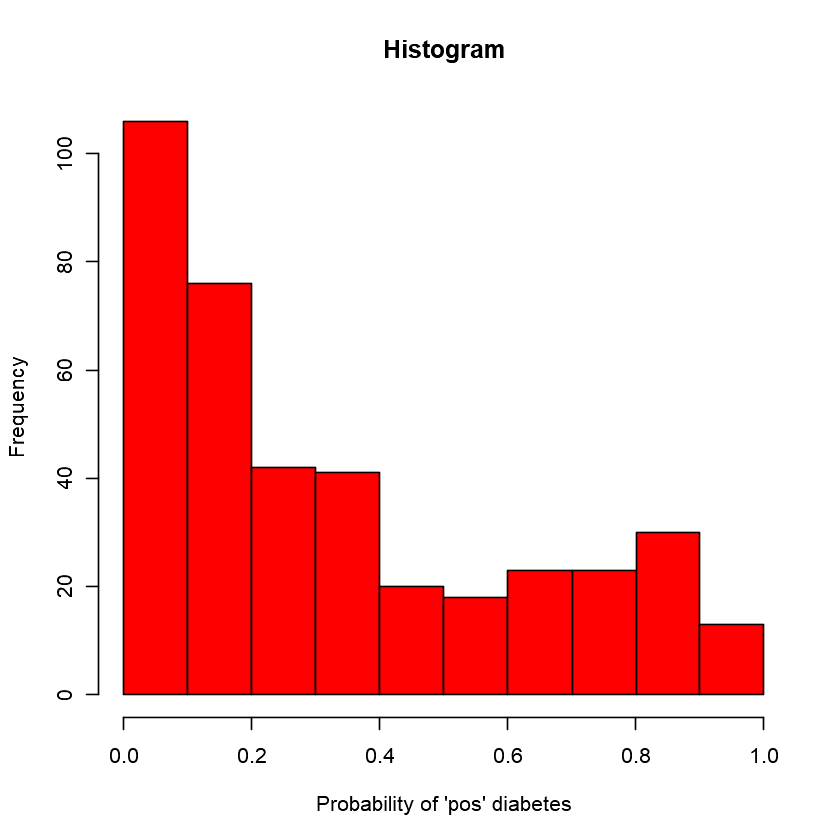

In [24]:
hist(logit_2$fitted.values,main = " Histogram ",xlab = "Probability of 'pos' diabetes", col = 'red')

In [25]:
newdata2$Predict <- ifelse(logit_2$fitted.values >0.5,"pos","neg")

In [26]:
logit_1$aic
logit_2$aic

[1] 361.9838

[1] 355.4159

In [27]:
mytable <- table(newdata2$diabetes,newdata2$Predict)
rownames(mytable) <- c("Obs. neg","Obs. pos")
colnames(mytable) <- c("Pred. neg","Pred. pos")
mytable

          
           Pred. neg Pred. pos
  Obs. neg       237        25
  Obs. pos        48        82

In [28]:
efficiency <- sum(diag(mytable))/sum(mytable)
efficiency

[1] 0.8137755

Setting levels: control = neg, case = pos

Setting direction: controls < cases




Call:
roc.formula(formula = diabetes ~ logit_2$fitted.values, data = newdata2,     plot = TRUE, main = "ROC CURVE", col = "blue")

Data: logit_2$fitted.values in 262 controls (diabetes neg) < 130 cases (diabetes pos).
Area under the curve: 0.8631

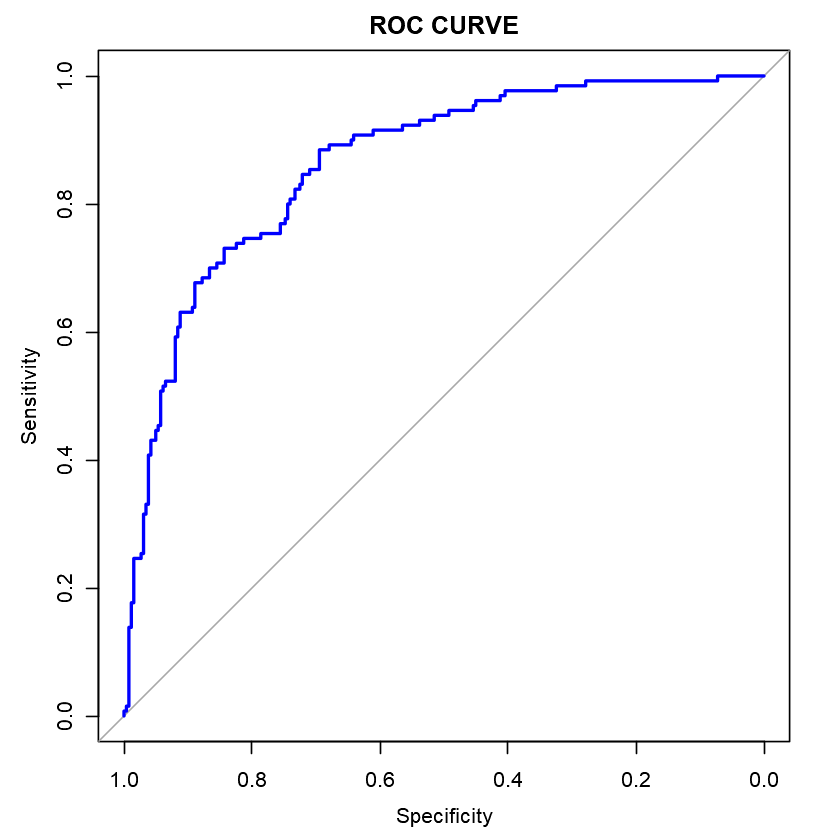

In [29]:
roc(diabetes~logit_2$fitted.values, data = newdata2, plot = TRUE, main = "ROC CURVE", col= "blue")

In [30]:
auc(diabetes~logit_2$fitted.values, data = newdata2)


Setting levels: control = neg, case = pos

Setting direction: controls < cases



Area under the curve: 0.8631